In [1]:
! pip install requests &> /dev/null

In [2]:
!pip install plotly &> /dev/null

In [3]:
!pip install -U scikit-learn &> /dev/null

In [4]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from datetime import datetime
import datetime as dt
import numpy as np
time_conv = np.vectorize(dt.datetime.fromtimestamp)

from sklearn.model_selection import train_test_split

from scipy.stats import norm
plt.style.use(["bmh"])

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
xmr = requests.get("https://api.kraken.com/0/public/OHLC?pair=xmrEUR&interval=1440")
xmr.encoding = "utf-8"
xmrjson = xmr.json()
b = xmrjson["result"]["XXMRZEUR"]

time = []
for e in b:
  time.append(e[0])

time = time_conv(time)
time = pd.DataFrame(time)

open = []
for e in b:
  open.append(e[1])

open = pd.DataFrame(open)

high = []
for e in b:
  high.append(e[2])

high = pd.DataFrame(high)

low = []
for e in b:
  low.append(e[3])

low = pd.DataFrame(low)

close = []
for e in b:
  close.append(e[4])

close = pd.DataFrame(close)

vwap = []
for e in b:
  vwap.append(e[5])

vwap = pd.DataFrame(vwap)

vol = []
for e in b:
  vol.append(e[6])

vol = pd.DataFrame(vol)

In [6]:
dataframe = pd.concat([time,open,high,low,close,vwap,vol], axis=1)

cols = ["time","open","high","low","close","volweightprice","volume"]
dataframe.columns = cols

dataframe.open = dataframe.open.astype(float)
dataframe.high = dataframe.high.astype(float)
dataframe.low = dataframe.low.astype(float)
dataframe.close = dataframe.close.astype(float)
dataframe.volweightprice = dataframe.volweightprice.astype(float)
dataframe.volume = dataframe.volume.astype(float)

In [7]:
dataframe["time"] = pd.to_datetime(dataframe.time)
dataframe.index = (dataframe["time"])

In [8]:
dataframe.index = ((dataframe.index - pd.to_datetime("1995-01-01")).days)

In [9]:
x = np.asarray(dataframe.index.values)

yclose  = np.asarray(dataframe["close"])
yopen  = np.asarray(dataframe["open"])
yhigh  = np.asarray(dataframe["high"])
ylow  = np.asarray(dataframe["low"])

In [10]:
lrc = LinearRegression()
lro = LinearRegression()
lrh = LinearRegression()
lrl = LinearRegression()

poly = PolynomialFeatures(3)

In [11]:
x_transform_forclose = poly.fit_transform(x.reshape(-1,1))
x_transform_foropen = poly.fit_transform(x.reshape(-1,1))
x_transform_forhigh = poly.fit_transform(x.reshape(-1,1))
x_transform_forlow = poly.fit_transform(x.reshape(-1,1))

In [12]:
lrc.fit(x_transform_forclose, yclose.reshape(-1,1))
lro.fit(x_transform_foropen, yopen.reshape(-1,1))
lrh.fit(x_transform_forhigh, yhigh.reshape(-1,1))
lrl.fit(x_transform_forlow, ylow.reshape(-1,1)) 
print("Vivo Assistants")

Vivo Assistants


In [13]:
y_close_learned  =  lrc.predict(x_transform_forclose)
y_open_learned  =  lro.predict(x_transform_foropen)
y_high_learned  =  lrh.predict(x_transform_forhigh)
y_low_learned  =  lrl.predict(x_transform_forlow)

In [14]:
xdaysfutures = np.asarray(pd.RangeIndex(start=x[-1]+1, stop=x[-1] + 15))

In [15]:
x_extended_transform = poly.fit_transform(xdaysfutures.reshape(-1,1))

In [16]:
y_close_predict = lrc.predict(x_extended_transform)
y_open_predict = lro.predict(x_extended_transform)
y_high_predict = lrh.predict(x_extended_transform)
y_low_predict = lrl.predict(x_extended_transform)

In [17]:
x = pd.to_datetime(dataframe.index, origin="1995-01-01", unit="D")

xdaysfutures = pd.to_datetime(xdaysfutures, origin="1995-01-01", unit="D")

In [18]:
y_open_predict = y_open_predict.flatten()
y_high_predict = y_high_predict.flatten()
y_low_predict = y_low_predict.flatten()
y_close_predict = y_close_predict.flatten()

In [19]:
dataset = pd.DataFrame({'time': xdaysfutures, 'open':y_open_predict, "high":y_high_predict,  "low":y_low_predict, "close":y_close_predict})

In [20]:
del dataframe["volweightprice"]
del dataframe["volume"]

In [21]:
frames = [dataframe, dataset]

result = pd.concat((dataframe,dataset), ignore_index=True)

In [22]:
print("Price predcition for", dt.date.today() + dt.timedelta(days=1) ,":", "%.2f" % y_close_predict[0],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=2) ,":", "%.2f" % y_close_predict[1],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=3) ,":", "%.2f" % y_close_predict[2],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=4) ,":", "%.2f" % y_close_predict[3],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=5) ,":", "%.2f" % y_close_predict[4],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=6) ,":", "%.2f" % y_close_predict[5],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=7) ,":", "%.2f" % y_close_predict[6],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=8) ,":", "%.2f" % y_close_predict[7],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=9) ,":", "%.2f" % y_close_predict[8],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=10) ,":", "%.2f" % y_close_predict[9],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=11) ,":", "%.2f" % y_close_predict[10],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=12) ,":", "%.2f" % y_close_predict[11],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=13) ,":", "%.2f" % y_close_predict[12],"Euros")
print("Price predcition for", dt.date.today() + dt.timedelta(days=14) ,":", "%.2f" % y_close_predict[13],"Euros")

Price predcition for 2020-12-19 : 129.22 Euros
Price predcition for 2020-12-20 : 129.92 Euros
Price predcition for 2020-12-21 : 130.62 Euros
Price predcition for 2020-12-22 : 131.33 Euros
Price predcition for 2020-12-23 : 132.05 Euros
Price predcition for 2020-12-24 : 132.76 Euros
Price predcition for 2020-12-25 : 133.49 Euros
Price predcition for 2020-12-26 : 134.21 Euros
Price predcition for 2020-12-27 : 134.94 Euros
Price predcition for 2020-12-28 : 135.67 Euros
Price predcition for 2020-12-29 : 136.41 Euros
Price predcition for 2020-12-30 : 137.15 Euros
Price predcition for 2020-12-31 : 137.90 Euros
Price predcition for 2021-01-01 : 138.65 Euros


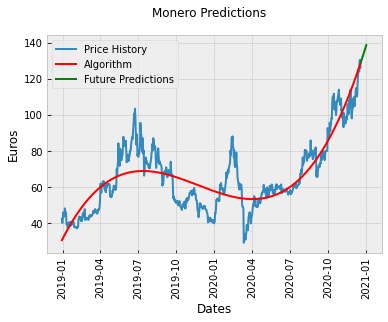

In [23]:
plt.plot(x, dataframe["close"], label="Price History")
plt.plot(x,y_close_learned, color="r", label="Algorithm")
plt.plot(xdaysfutures, y_close_predict, color="g", label="Future Predictions")
plt.suptitle("Monero Predictions")
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Euros")
plt.xticks(rotation=90)
plt.show()